In [1]:

%matplotlib notebook
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import os


In [2]:
trace_file = "/mnt/3FB130B83E42738E/symbol-Tue_Mar_24_09:23:14_2020.trace.v1"

def readTraceHeader(file_path) :
    dt_header = np.dtype([
        ('magic', np.int64), ('FileVersion', np.int32),
        ('n_records', np.int32), ('n_phases', np.int32),('n_kinds', np.int32), ('n_symbols', np.int32),
        ('offset_records', np.int32), ('offset_phases', np.int32),('offset_kinds', np.int32), ('offset_symbol_info_descriptors', np.int32)
    ])

    header_f = np.fromfile(file=file_path, dtype=dt_header, count=1)
    header = pd.DataFrame(header_f, columns=header_f.dtype.names)
    return header

def readProfileRecords(file_path, h) :
    dt_record_v1 = ([
                    ('begin_ticks', np.int64), ('end_ticks', np.int64),
                    ('begin_mem', np.int64),('end_mem', np.int64),
                    ('symbol_id', np.int32), ('kind_id', np.uint16), ('phase_id', np.uint16)
    ])
    f = open(file_path, "rb")
    f.seek(h.offset_records[0], os.SEEK_SET)
    record_f = np.fromfile(file=f, dtype=dt_record_v1, count=h.n_records)
    records = pd.DataFrame(record_f, columns=record_f.dtype.names)
    return records
   


In [3]:
h = readTraceHeader(trace_file)
h

,magic,FileVersion,n_records,n_phases,n_kinds,n_symbols,offset_records,offset_phases,offset_kinds,offset_symbol_info_descriptors
0,4990904633913527620,1,29954052,0,0,0,48,0,0,0


In [4]:
%%time
records = readProfileRecords(trace_file, h)
print(len(records))

29954052
CPU times: user 467 ms, sys: 655 ms, total: 1.12 s
Wall time: 1.12 s


In [8]:
r = records
r['taken_ticks'] = r['end_ticks'] - r['begin_ticks']
r['mem_taken'] = r['end_mem'] - r['begin_mem']
r[r['symbol_id'] == -1].kind_id.unique()
r.head(30)

,begin_ticks,end_ticks,begin_mem,end_mem,symbol_id,kind_id,phase_id,taken_ticks,mem_taken
0,27283373244500,27283373247288,810123,810123,1,1,1,2788,0
1,27283373271938,27283373272346,814415,814415,2,1,1,408,0
2,27283373285436,27283373285776,814603,814603,3,1,1,340,0
3,27283373296656,27283373296996,814791,814791,4,1,1,340,0
4,27283373307910,27283373308284,814979,814979,5,1,1,374,0
5,27283373318926,27283373319266,815167,815167,6,1,1,340,0
6,27283373329534,27283373329874,815355,815355,7,1,1,340,0
7,27283373340550,27283373340924,815543,815543,8,1,1,374,0
8,27283373352008,27283373352382,815731,815731,9,1,1,374,0
9,27283373362854,27283373363466,815919,815919,10,1,1,612,0


In [6]:
taken_ticks_median = r['taken_ticks'].median()
taken_ticks_avg = r['taken_ticks'].mean()
mem_taken_median = r['mem_taken'].median()
mem_taken_avg = r['mem_taken'].mean()
(taken_ticks_median, taken_ticks_avg, mem_taken_median, mem_taken_avg)

(1870.0, 177808.9652969822, 104.0, 15680.816170580194)

In [19]:
filtered_r = r[(r['taken_ticks'] > taken_ticks_avg)].sort_values('taken_ticks', ascending = False)
"plot_r = filtered_r.head(1000).reset_index()['taken_ticks']"
plot_r = r['begin_ticks']
filtered_r.head()

,begin_ticks,end_ticks,begin_mem,end_mem,symbol_id,kind_id,phase_id,taken_ticks,mem_taken
24685301,27399850245328,27403404424992,10076830363,10369399210,9679998,42,9,3554179664,292568847
24685302,27399850246620,27403404420674,10076830363,10369399210,9679999,54,9,3554174054,292568847
24685351,27399850382008,27403404340876,10076839587,10369399050,9680017,31,2,3553958868,292559463
24685352,27399850382246,27403404338088,10076839587,10369399050,9680017,31,7,3553955842,292559463
24685405,27399850603280,27403368373670,10076854537,10369398352,9680039,42,9,3517770390,292543815


<IPython.core.display.Javascript object>


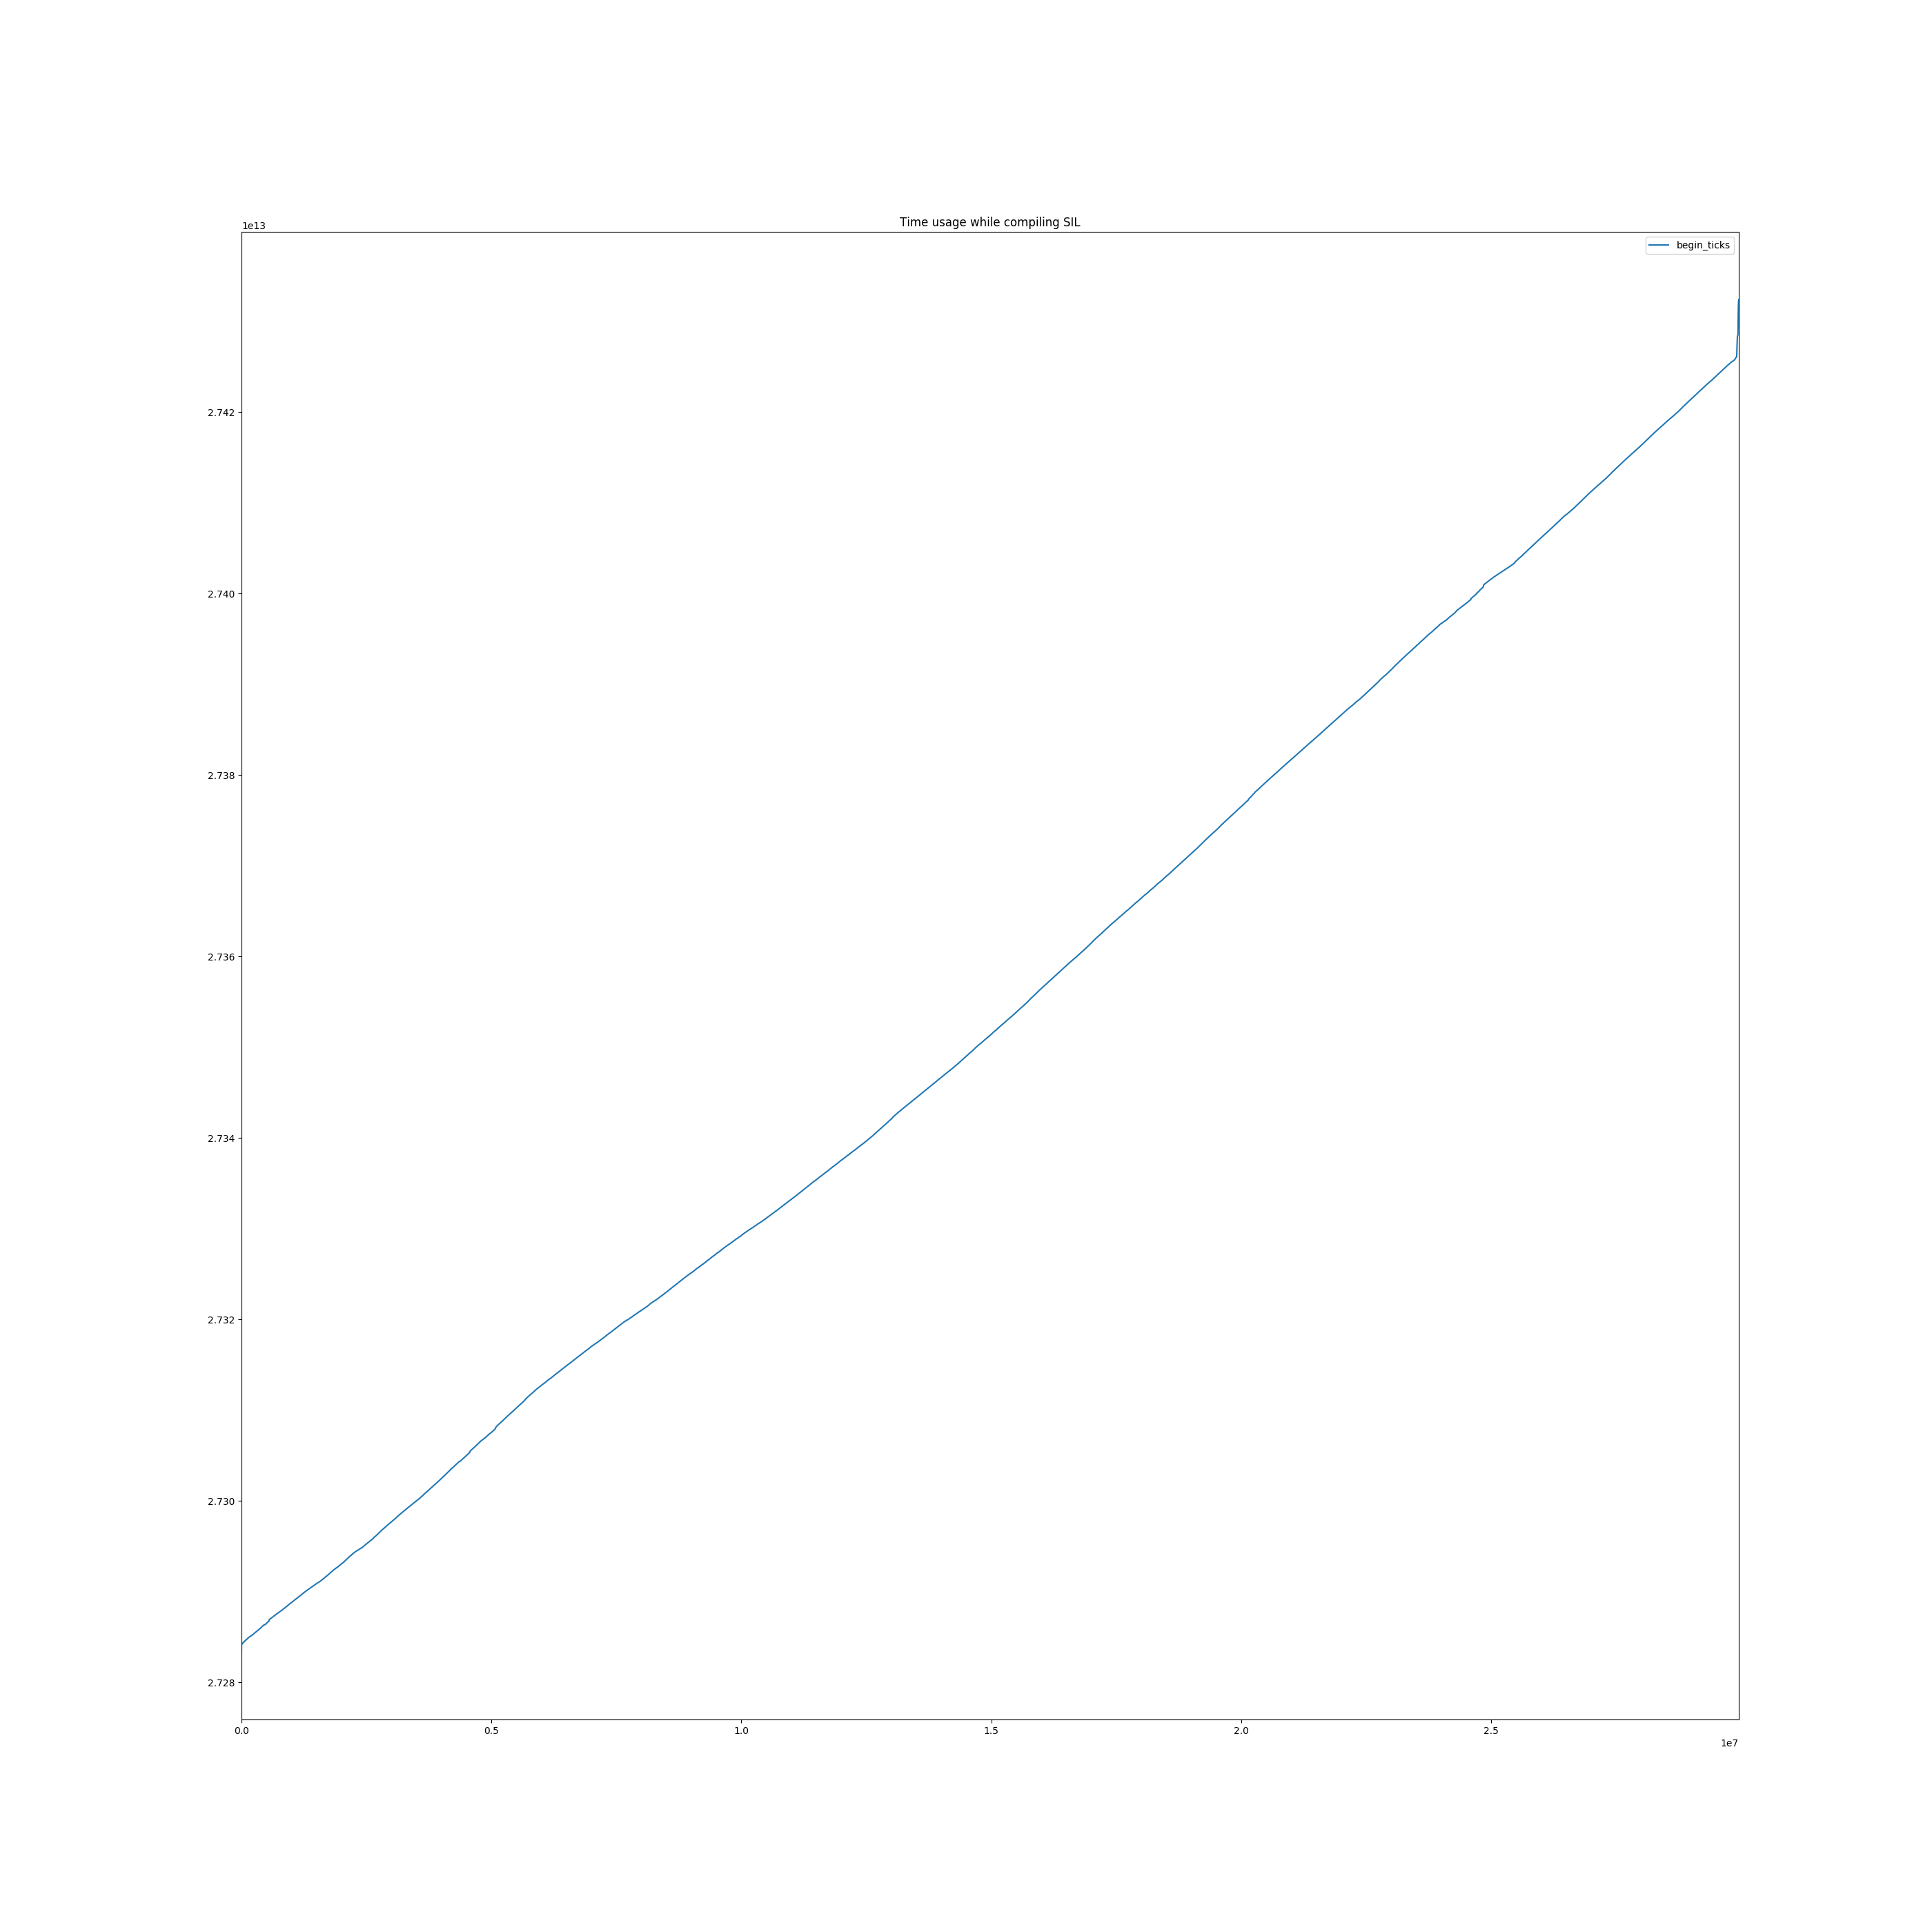

In [20]:
f = plot_r.plot(legend=True, figsize = (28,28), title = "Time usage while compiling SIL")
plt.savefig(trace_file + "time.png")
f

In [ ]:
len(r)